In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam



In [ ]:
# Correct path to the uploaded file
file_path = 'absorption data_ML.csv'  # Use the actual uploaded file ID path

# Read the Excel file
data = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
data.transpose()
#print(data.head)
#print(data.size)
#print(data.columns)

,0,1,2,3,4,5,6,7,8,9,...,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790
Photon Energy (eV),0.068500,0.137000,0.205500,0.274000,0.342500,0.411000,0.479500,0.548100,0.616600,0.685100,...,122.079100,122.147700,122.216200,122.284700,122.353200,122.421700,122.490200,122.558700,122.62720,122.695700
Absorption Intensity,0.017628,0.071871,0.165696,0.296783,0.432209,0.499778,0.512657,0.526335,0.540236,0.546083,...,0.060865,0.060898,0.060928,0.060961,0.060994,0.061024,0.061057,0.061087,0.06112,0.061153


In [ ]:
# Load the dataset
X = data[['Photon Energy (eV)']].values.reshape(-1, 1)  # Reshape to (n_samples, 1) for Qiskit compatibility
y = data['Absorption Intensity'].values  # Target variable

In [ ]:
# Load and preprocess the dataset
# Assuming the dataset has been loaded into variables X and y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN and LSTM
timesteps = 1
features = X_train.shape[1]
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, features)
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, features)

Linear Regression - MSE: 0.05, R2: 0.73


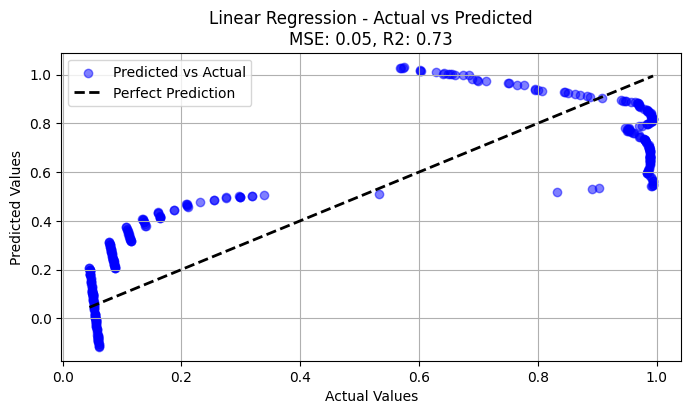

In [ ]:
# Architecture 1: Linear Regression
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.2f}, R2: {r2:.2f}")

plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression - Actual vs Predicted\nMSE: {mse:.2f}, R2: {r2:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Architecture 2: Feedforward Neural Network
ffnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation=None)
])
ffnn_model.compile(optimizer=Adam(learning_rate=0.02, epsilon=1e-7, ema_momentum=0.99), loss='mse', metrics=['mae'])
ffnn_history = ffnn_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=0)
ffnn_eval = ffnn_model.evaluate(X_test, y_test)
print("\nFeedforward Neural Network Test - MSE:", ffnn_eval[0], "MAE:", ffnn_eval[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5579e-04 - mae: 0.0198 

Feedforward Neural Network Test - MSE: 0.0005461577675305307 MAE: 0.019553156569600105


In [ ]:
# Architecture 3: Deep Neural Network (DNN)
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation=None)
])
dnn_model.compile(optimizer=Adam(learning_rate=0.02, epsilon=1e-7, ema_momentum=0.99), loss='mse', metrics=['mae'])
dnn_history = dnn_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=0)
dnn_eval = dnn_model.evaluate(X_test, y_test)
print("\nDNN Test - MSE:", dnn_eval[0], "MAE:", dnn_eval[1])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mae: 0.0323     

DNN Test - MSE: 0.001994574209675193 MAE: 0.0316493958234787


In [ ]:
# Architecture 4: RNN
rnn_model = Sequential([
    SimpleRNN(64, input_shape=(timesteps, features), return_sequences=True),
    SimpleRNN(32),
    Dense(1, activation=None)
])
rnn_model.compile(optimizer=Adam(learning_rate=0.02, epsilon=1e-7, ema_momentum=0.99), loss='mse', metrics=['mae'])
rnn_history = rnn_model.fit(X_train_lstm, y_train, epochs=1000, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=0)
rnn_eval = rnn_model.evaluate(X_test_lstm, y_test)
print("\nRNN Test - MSE:", rnn_eval[0], "MAE:", rnn_eval[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057 - mae: 0.0661 

RNN Test - MSE: 0.005810355301946402 MAE: 0.06602806597948074


In [ ]:
# Architecture 5: LSTM
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, features), return_sequences=True),
    LSTM(32),
    Dense(1, activation=None)
])
lstm_model.compile(optimizer=Adam(learning_rate=0.02, epsilon=1e-7, ema_momentum=0.99), loss='mse', metrics=['mae'])
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=1000, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=0)
lstm_eval = lstm_model.evaluate(X_test_lstm, y_test)
print("\nLSTM Test - MSE:", lstm_eval[0], "MAE:", lstm_eval[1])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0590e-04 - mae: 0.0081 

LSTM Test - MSE: 0.00010083585948450491 MAE: 0.007979659363627434


In [ ]:
# Print the metrics for each architecture
print(f"Linear Regression - Training MSE: {mse:.4f}, R2: {r2:.4f}")

print(f"\nFFNN - "
      f"Training Loss: {ffnn_history.history['loss'][-1]:.4f}, "
      f"Validation Loss: {ffnn_history.history['val_loss'][-1]:.4f}, "
      f"Testing MSE: {ffnn_eval[0]:.4f}, "
      f"Testing MAE: {ffnn_eval[1]:.4f}")

print(f"\nDNN - "
      f"Training Loss: {dnn_history.history['loss'][-1]:.4f}, "
      f"Validation Loss: {dnn_history.history['val_loss'][-1]:.4f}, "
      f"Testing MSE: {dnn_eval[0]:.4f}, "
      f"Testing MAE: {dnn_eval[1]:.4f}")

print(f"\nRNN - "
      f"Training Loss: {rnn_history.history['loss'][-1]:.4f}, "
      f"Validation Loss: {rnn_history.history['val_loss'][-1]:.4f}, "
      f"Testing MSE: {rnn_eval[0]:.4f}, "
      f"Testing MAE: {rnn_eval[1]:.4f}")

print(f"\nLSTM - "
      f"Training Loss: {lstm_history.history['loss'][-1]:.4f}, "
      f"Validation Loss: {lstm_history.history['val_loss'][-1]:.4f}, "
      f"Testing MSE: {lstm_eval[0]:.4f}, "
      f"Testing MAE: {lstm_eval[1]:.4f}")

Linear Regression - Training MSE: 0.0488, R2: 0.7261

FFNN - Training Loss: 0.0007, Validation Loss: 0.0005, Testing MSE: 0.0005, Testing MAE: 0.0196

DNN - Training Loss: 0.0039, Validation Loss: 0.0020, Testing MSE: 0.0020, Testing MAE: 0.0316

RNN - Training Loss: 0.0018, Validation Loss: 0.0058, Testing MSE: 0.0058, Testing MAE: 0.0660

LSTM - Training Loss: 0.0005, Validation Loss: 0.0001, Testing MSE: 0.0001, Testing MAE: 0.0080


In [ ]:
#print(f"Linear Regression R2 Test Accuracy: {r2 *100:.2f}%")
print(f"Linear Regression - MSE: {mse:.2f}, R2: {r2:.2f}")
print(f"Feedforward Neural Network Test Accuracy: {ffnn_eval[1] * 100:.2f}%")
print(f"DNN Test Accuracy: {dnn_eval[1] * 100: .2f}%")
print(f"RNN Test Accuracy: {rnn_eval[1] * 100: .2f}%")
print(f"LSTM Test Accuracy: {lstm_eval[1] * 100: .2f}%")

Linear Regression - MSE: 0.05, R2: 0.73
Feedforward Neural Network Test Accuracy: 1.96%
DNN Test Accuracy:  3.16%
RNN Test Accuracy:  6.60%
LSTM Test Accuracy:  0.80%


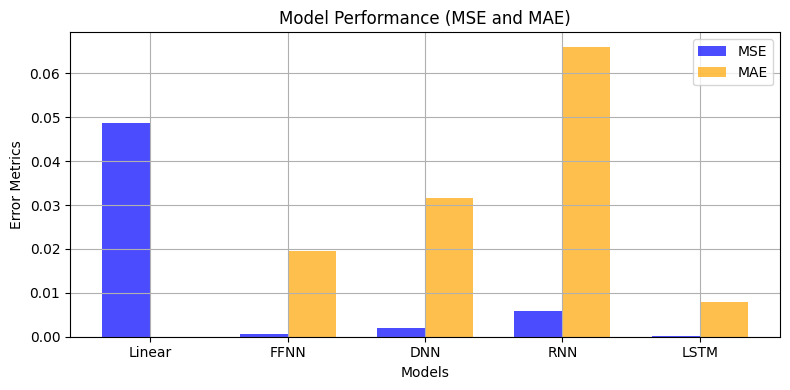

In [ ]:
# 1. Model Performance (MSE and MAE)
# List of model names
models = ["Linear", "FFNN", "DNN", "RNN", "LSTM"]

# Automatically retrieve metrics
mse_values = [
    mse,  # Linear Regression MSE
    ffnn_eval[0],  # FFNN MSE
    dnn_eval[0],  # DNN MSE
    rnn_eval[0],  # RNN MSE
    lstm_eval[0]  # LSTM MSE
]

mae_values = [value if value is not None else 0 for value in mae_values]


# Define x-axis positions
x = np.arange(len(models))  # Label locations
width = 0.35  # Width of bars

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
bar1 = ax.bar(x - width/2, mse_values, width, label="MSE", color="blue", alpha=0.7)
bar2 = ax.bar(x + width/2, mae_values, width, label="MAE", color="orange", alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel("Models")
ax.set_ylabel("Error Metrics")
ax.set_title("Model Performance (MSE and MAE)")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

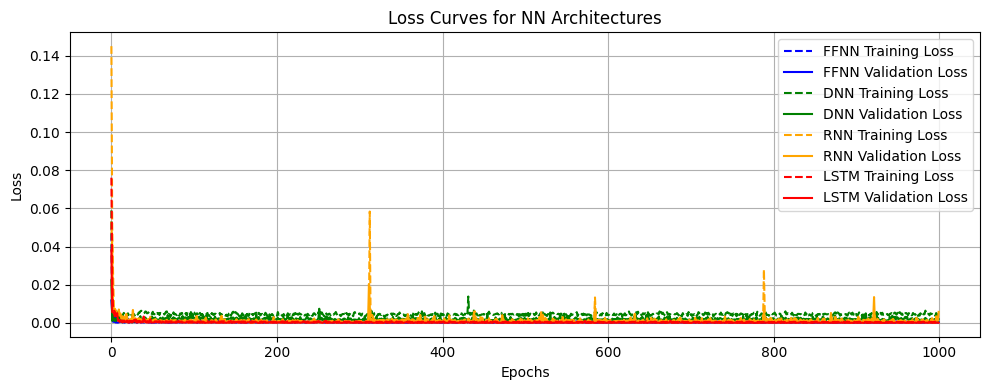

In [ ]:
#2. Loss Curves for NN (FFNN, DNN, RNN, LSTM)

#We will plot the loss curves for all neural network architectures side by side.

plt.figure(figsize=(10, 4))

# FFNN Loss Curve
plt.plot(ffnn_history.history["loss"], label="FFNN Training Loss", linestyle="--", color="blue")
plt.plot(ffnn_history.history["val_loss"], label="FFNN Validation Loss", linestyle="-", color="blue")

# DNN Loss Curve
plt.plot(dnn_history.history["loss"], label="DNN Training Loss", linestyle="--", color="green")
plt.plot(dnn_history.history["val_loss"], label="DNN Validation Loss", linestyle="-", color="green")

# RNN Loss Curve
plt.plot(rnn_history.history["loss"], label="RNN Training Loss", linestyle="--", color="orange")
plt.plot(rnn_history.history["val_loss"], label="RNN Validation Loss", linestyle="-", color="orange")

# LSTM Loss Curve
plt.plot(lstm_history.history["loss"], label="LSTM Training Loss", linestyle="--", color="red")
plt.plot(lstm_history.history["val_loss"], label="LSTM Validation Loss", linestyle="-", color="red")

# Labels and Legend
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves for NN Architectures")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

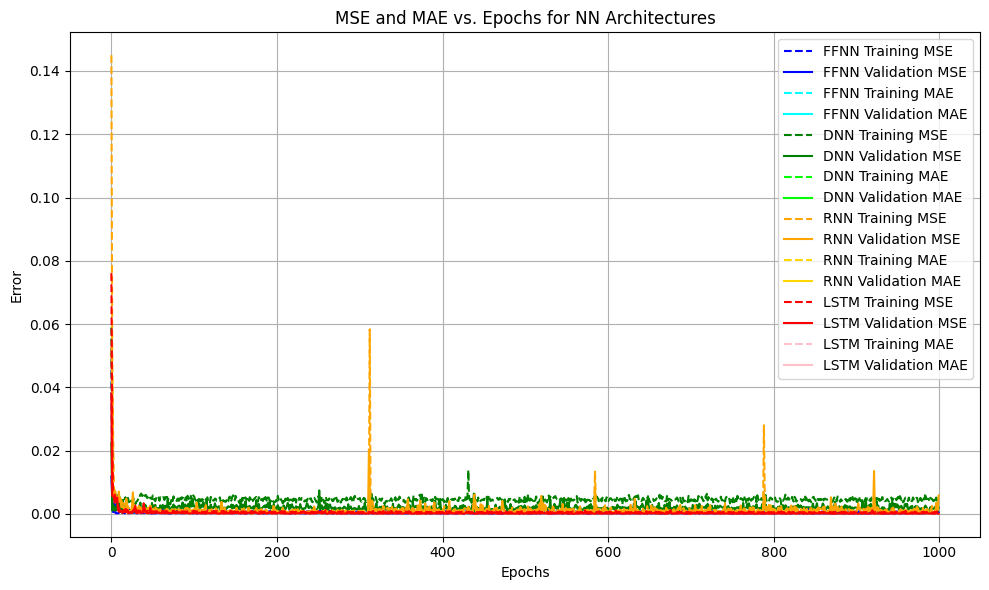

In [ ]:

# 3. MSE and MAE Vs Epoch
plt.figure(figsize=(10, 6))

# FFNN - MSE and MAE
plt.plot(ffnn_history.history["loss"], label="FFNN Training MSE", linestyle="--", color="blue")
plt.plot(ffnn_history.history["val_loss"], label="FFNN Validation MSE", linestyle="-", color="blue")
plt.plot(ffnn_history.history.get("mean_absolute_error", []), label="FFNN Training MAE", linestyle="--", color="cyan")
plt.plot(ffnn_history.history.get("val_mean_absolute_error", []), label="FFNN Validation MAE", linestyle="-", color="cyan")

# DNN - MSE and MAE
plt.plot(dnn_history.history["loss"], label="DNN Training MSE", linestyle="--", color="green")
plt.plot(dnn_history.history["val_loss"], label="DNN Validation MSE", linestyle="-", color="green")
plt.plot(dnn_history.history.get("mean_absolute_error", []), label="DNN Training MAE", linestyle="--", color="lime")
plt.plot(dnn_history.history.get("val_mean_absolute_error", []), label="DNN Validation MAE", linestyle="-", color="lime")

# RNN - MSE and MAE
plt.plot(rnn_history.history["loss"], label="RNN Training MSE", linestyle="--", color="orange")
plt.plot(rnn_history.history["val_loss"], label="RNN Validation MSE", linestyle="-", color="orange")
plt.plot(rnn_history.history.get("mean_absolute_error", []), label="RNN Training MAE", linestyle="--", color="gold")
plt.plot(rnn_history.history.get("val_mean_absolute_error", []), label="RNN Validation MAE", linestyle="-", color="gold")

# LSTM - MSE and MAE
plt.plot(lstm_history.history["loss"], label="LSTM Training MSE", linestyle="--", color="red")
plt.plot(lstm_history.history["val_loss"], label="LSTM Validation MSE", linestyle="-", color="red")
plt.plot(lstm_history.history.get("mean_absolute_error", []), label="LSTM Training MAE", linestyle="--", color="pink")
plt.plot(lstm_history.history.get("val_mean_absolute_error", []), label="LSTM Validation MAE", linestyle="-", color="pink")

# Labels and Legend
#plt.ylim(0,0.05)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("MSE and MAE vs. Epochs for NN Architectures")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

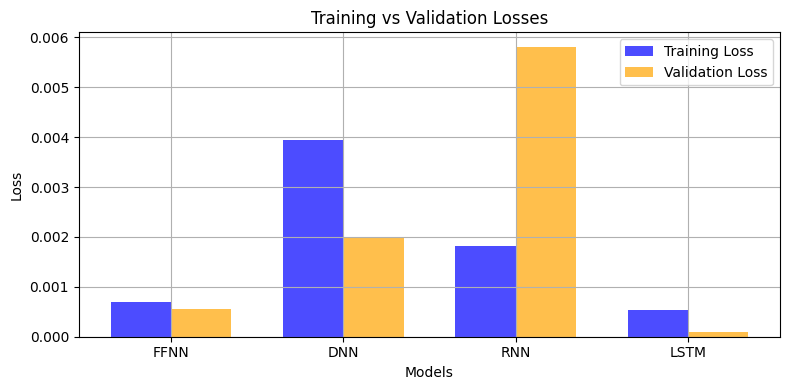

In [ ]:
#4. Training vs Validation (FFNN, DNN, RNN, LSTM)

#Well visualize training vs validation losses for each NN model in one grouped chart.

training_losses = [
    ffnn_history.history["loss"][-1],
    dnn_history.history["loss"][-1],
    rnn_history.history["loss"][-1],
    lstm_history.history["loss"][-1],
]
validation_losses = [
    ffnn_history.history["val_loss"][-1],
    dnn_history.history["val_loss"][-1],
    rnn_history.history["val_loss"][-1],
    lstm_history.history["val_loss"][-1],
]

models = ["FFNN", "DNN", "RNN", "LSTM"]
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x - width/2, training_losses, width, label="Training Loss", color="blue", alpha=0.7)
ax.bar(x + width/2, validation_losses, width, label="Validation Loss", color="orange", alpha=0.7)

ax.set_xlabel("Models")
ax.set_ylabel("Loss")
ax.set_title("Training vs Validation Losses")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


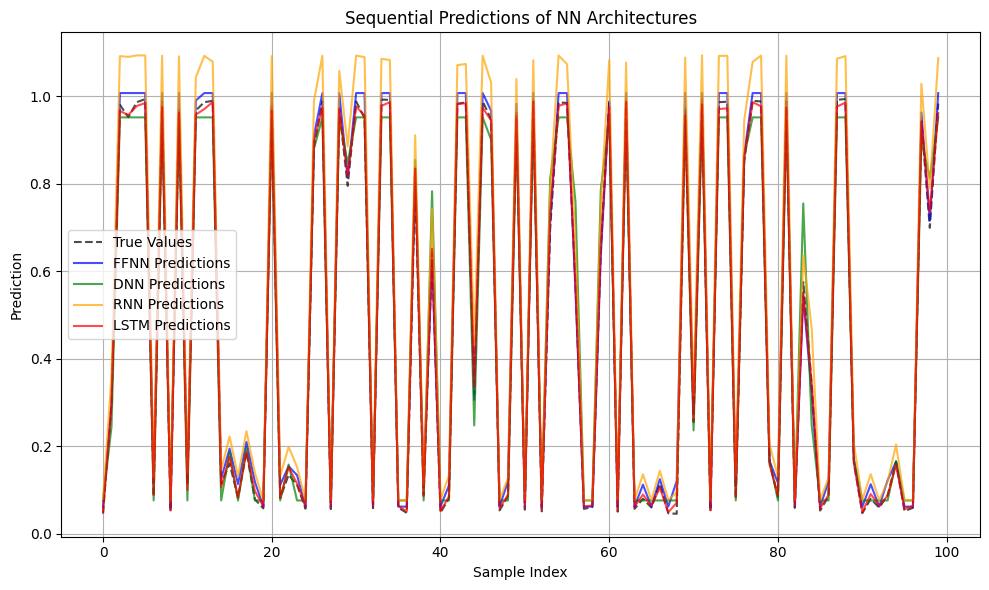

In [ ]:

#5. Sequential Predictions (FFNN, DNN, RNN, LSTM)

#We will compare the sequential predictions for all four architectures.

plt.figure(figsize=(10, 6))

# Plot ground truth
plt.plot(y_test[:100], label="True Values", linestyle="--", color="black", alpha=0.7)

# FFNN Predictions
plt.plot(ffnn_model.predict(X_test)[:100], label="FFNN Predictions", linestyle="-", color="blue", alpha=0.7)

# DNN Predictions
plt.plot(dnn_model.predict(X_test)[:100], label="DNN Predictions", linestyle="-", color="green", alpha=0.7)

# RNN Predictions
plt.plot(rnn_model.predict(X_test_lstm)[:100], label="RNN Predictions", linestyle="-", color="orange", alpha=0.7)

# LSTM Predictions
plt.plot(lstm_model.predict(X_test_lstm)[:100], label="LSTM Predictions", linestyle="-", color="red", alpha=0.7)

# Labels and Legend
plt.xlabel("Sample Index")
plt.ylabel("Prediction")
plt.title("Sequential Predictions of NN Architectures")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


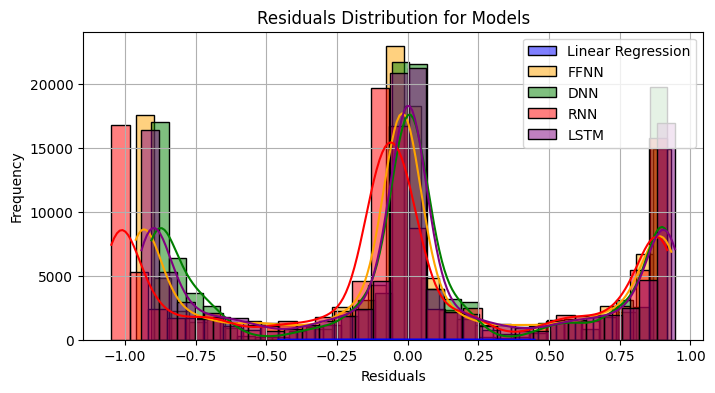

In [ ]:
#6. Error Distribution Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Residuals for each model
residuals_linear = y_test - y_pred
residuals_ffnn = y_test - ffnn_model.predict(X_test)
residuals_dnn = y_test - dnn_model.predict(X_test)
residuals_rnn = y_test - rnn_model.predict(X_test_lstm)
residuals_lstm = y_test - lstm_model.predict(X_test_lstm)

# Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals_linear, kde=True, label="Linear Regression", color="blue", bins=30)
sns.histplot(residuals_ffnn.flatten(), kde=True, label="FFNN", color="orange", bins=30)
sns.histplot(residuals_dnn.flatten(), kde=True, label="DNN", color="green", bins=30)
sns.histplot(residuals_rnn.flatten(), kde=True, label="RNN", color="red", bins=30)
sns.histplot(residuals_lstm.flatten(), kde=True, label="LSTM", color="purple", bins=30)
plt.title("Residuals Distribution for Models")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

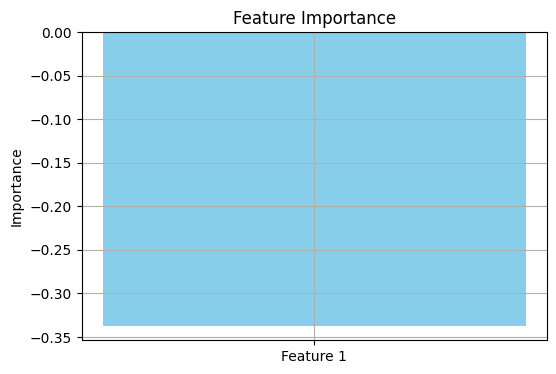

In [ ]:
#7. Feature Importance

# Example: Feature importance for Linear Regression
feature_importance = linear_model.coef_

plt.figure(figsize=(6, 4))
plt.bar(['Feature 1'], feature_importance, color='skyblue')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.grid(True)
plt.show()

### Statistics

In [ ]:
# 1. Descriptive statistics
print("Descriptive Statistics:\n")
print(data.describe())
print("\nSkewness:\n", data.skew())
print("\nKurtosis:\n", data.kurtosis())

Descriptive Statistics:

       Photon Energy (eV)  Absorption Intensity
count         1791.000000           1791.000000
mean            61.382107              0.465533
std             35.429087              0.415067
min              0.068500              0.017628
25%             30.725350              0.059438
50%             61.382100              0.209275
75%             92.038950              0.970820
max            122.695700              0.994033

Skewness:
 Photon Energy (eV)     -1.018051e-08
Absorption Intensity    2.443919e-01
dtype: float64

Kurtosis:
 Photon Energy (eV)     -1.200000
Absorption Intensity   -1.807647
dtype: float64


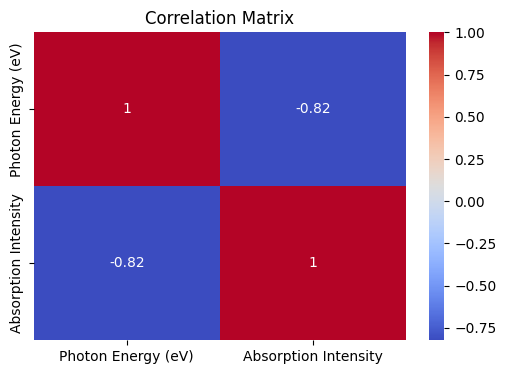

In [ ]:
2. # Correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

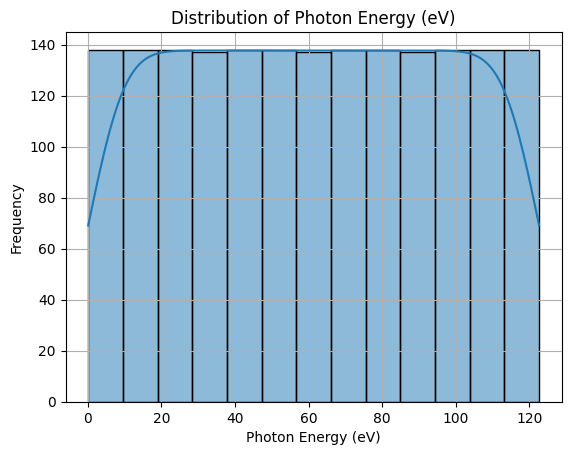

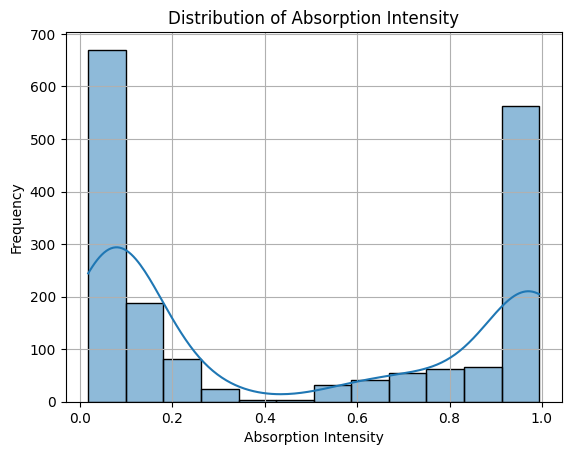

In [ ]:
# 3. Distribution plots
for column in data.columns:
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

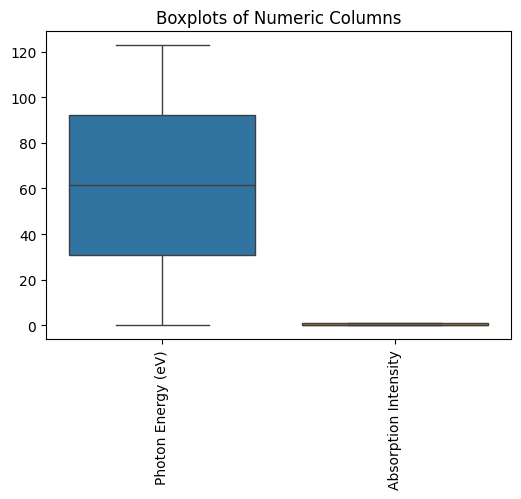

In [ ]:
# 4. Boxplots for each column
# Boxplot for each numeric column
plt.figure(figsize=(6, 4))
sns.boxplot(data=data)
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# 7. T-test between two features
stat, p = ttest_ind(data["Photon Energy (eV)"], data["Absorption Intensity"])
print(f"T-Test: stat = {stat:.4f}, p = {p:.4f}")

T-Test: stat = 72.7601, p = 0.0000


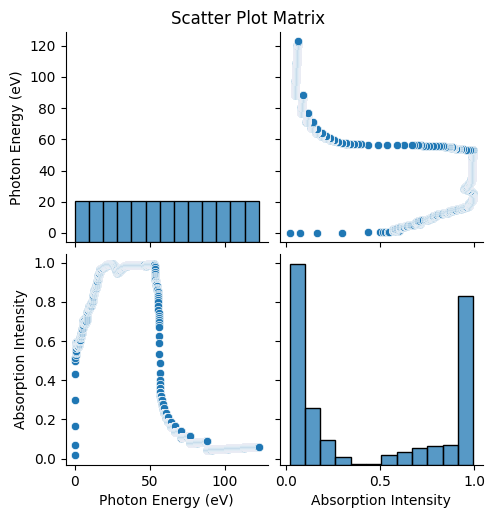

In [ ]:
# 8. Scatter plot matrix for pairs of variables
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

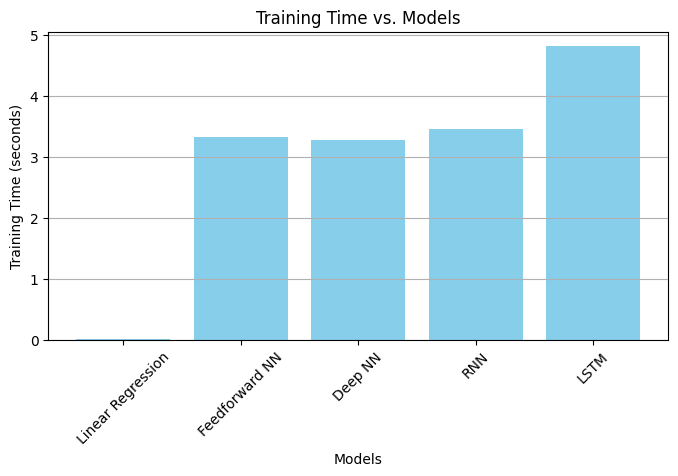

In [ ]:
import time

# Dictionary to store training times
training_times = {}

# Example: Measuring time for training each model
start_time = time.time()
linear_model.fit(X_train, y_train)
training_times["Linear Regression"] = time.time() - start_time

start_time = time.time()
ffnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
training_times["Feedforward NN"] = time.time() - start_time

start_time = time.time()
dnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
training_times["Deep NN"] = time.time() - start_time

start_time = time.time()
rnn_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=0)
training_times["RNN"] = time.time() - start_time

start_time = time.time()
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=0)
training_times["LSTM"] = time.time() - start_time


# Visualize training times
plt.figure(figsize=(8, 4))
plt.bar(training_times.keys(), training_times.values(), color="skyblue")
plt.xlabel("Models")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs. Models")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

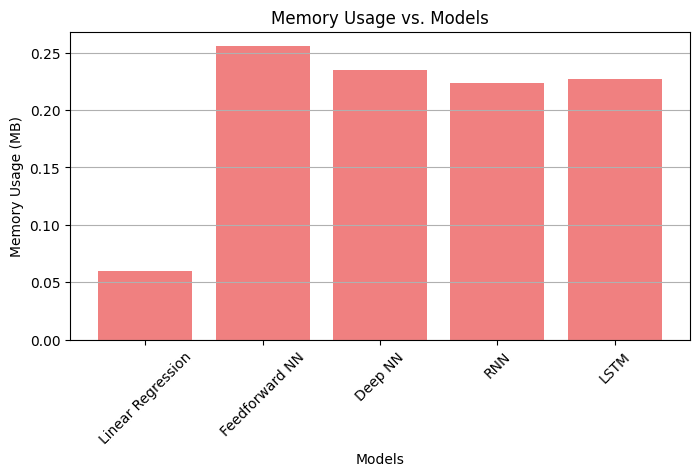

In [ ]:
import tracemalloc

# Dictionary to store memory usage
memory_usage = {}

# Example: Measuring memory for each model
tracemalloc.start()
linear_model.fit(X_train, y_train)
current, peak = tracemalloc.get_traced_memory()
memory_usage["Linear Regression"] = peak / (1024 * 1024)  # Convert to MB
tracemalloc.stop()

tracemalloc.start()
ffnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
current, peak = tracemalloc.get_traced_memory()
memory_usage["Feedforward NN"] = peak / (1024 * 1024)
tracemalloc.stop()

tracemalloc.start()
ffnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
current, peak = tracemalloc.get_traced_memory()
memory_usage["Deep NN"] = peak / (1024 * 1024)
tracemalloc.stop()

tracemalloc.start()
ffnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
current, peak = tracemalloc.get_traced_memory()
memory_usage["RNN"] = peak / (1024 * 1024)
tracemalloc.stop()

tracemalloc.start()
ffnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
current, peak = tracemalloc.get_traced_memory()
memory_usage["LSTM"] = peak / (1024 * 1024)
tracemalloc.stop()

# Visualize memory usage
plt.figure(figsize=(8, 4))
plt.bar(memory_usage.keys(), memory_usage.values(), color="lightcoral")
plt.xlabel("Models")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage vs. Models")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()
